In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Load dataset (Replace with your dataset path if needed)
data = pd.read_csv("diabetes.csv")

# Split features and labels
X = data.drop(columns=["Outcome"])  # Features
y = data["Outcome"]  # Target variable (Diabetes: 1, No Diabetes: 0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the fitted scaler for later use in Flask API
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved successfully!")

# Display dataset shape
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Scaler saved successfully!
Training data shape: (614, 8)
Testing data shape: (154, 8)


In [14]:
# Import necessary libraries
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

# Define the improved neural network architecture
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),  # Input layer
    BatchNormalization(),  # Normalize activations for stability
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # Hidden layer 1
    Dropout(0.3),  # Reduce overfitting
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),  # Hidden layer 2
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),  # Hidden layer 3
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with a lower learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the improved model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=75, batch_size=16)

# Evaluate the improved model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nImproved Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/75


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5297 - loss: 0.8190 - val_accuracy: 0.6429 - val_loss: 0.7567
Epoch 2/75
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6632 - loss: 0.7186 - val_accuracy: 0.6883 - val_loss: 0.7083
Epoch 3/75
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7429 - loss: 0.6425 - val_accuracy: 0.7208 - val_loss: 0.6730
Epoch 4/75
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7487 - loss: 0.6251 - val_accuracy: 0.7273 - val_loss: 0.6461
Epoch 5/75
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7508 - loss: 0.6134 - val_accuracy: 0.7078 - val_loss: 0.6400
Epoch 6/75
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7525 - loss: 0.5894 - val_accuracy: 0.7468 - val_loss: 0.6135
Epoch 7/75
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7575 - loss: 0.5888 - val_accuracy: 0.7468 - val_loss: 0.6071
Epoch 8/75
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7599 - loss: 0.6028 - val_accuracy: 0.7532 - val_loss: 0.5964
Ep

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Accuracy: 0.77
Precision: 0.69
Recall: 0.65
F1-Score: 0.67
ROC-AUC: 0.80


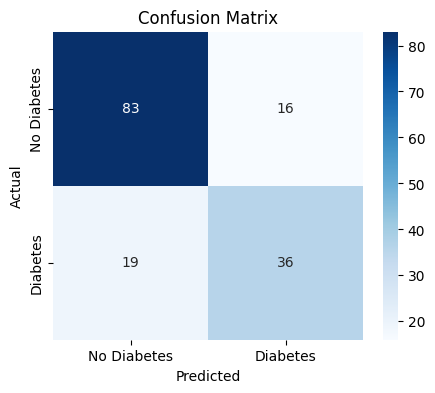

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Get model predictions
y_pred_probs = model.predict(X_test)  # Probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
import tensorflow as tf

# Save the trained model
model.save("diabetes_model.h5")
print("Model saved successfully!")


Model saved successfully!
